# Netflix Movies Data Analysis

# Project Overview
This notebook conducts a comprehensive analysis of movie data, examining release dates, popularity metrics, vote counts, and genre distributions to uncover trends and patterns in the film industry.

Data Import and Preparation

In [28]:
!pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\SUYASH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("moviedb.csv")

Initial Data Exploration

In [31]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


Data Cleaning and Preprocessing

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


Converting data types and handling any anomalies in the data.

In [35]:
df["Vote_Count"] = pd.to_numeric(df["Vote_Count"], errors='coerce')
df["Vote_Average"] = pd.to_numeric(df["Vote_Average"], errors='coerce')
df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors='coerce')

print(df["Vote_Count"].dtype)
print(df["Vote_Average"].dtype)
print(df["Release_Date"].dtype)

float64
float64
datetime64[ns]


C:\Users\SUYASH\AppData\Local\Temp\ipykernel_20428\968510010.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors='coerce')


In [36]:
df["Release_Date"] = df["Release_Date"].dt.year
df["Release_Date"].head()

0    2021.0
1    2022.0
2    2022.0
3    2021.0
4    2021.0
Name: Release_Date, dtype: float64

In [37]:
cols = ["Overview", "Original_Language", "Poster_Url"]
df.drop(columns=cols, inplace=True, axis=1)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [38]:
def catigorical_col(df, col, labels):

    edges = [df[col].describe()["min"],
             df[col].describe()["25%"],
             df[col].describe()["50%"],
             df[col].describe()["75%"],
             df[col].describe()["max"]]
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates="drop")
    return df

In [39]:
labels = ["NotPopular", "BelowAvg", "Avgrage", "Popular"]
catigorical_col(df, "Vote_Average", labels)
df["Vote_Average"].unique()

['Popular', 'BelowAvg', 'Avgrage', 'NotPopular', NaN]
Categories (4, object): ['NotPopular' < 'BelowAvg' < 'Avgrage' < 'Popular']

In [40]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,Popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151.0,Popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122.0,BelowAvg,Thriller
3,2021.0,Encanto,2402.201,5076.0,Popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793.0,Avgrage,"Action, Adventure, Thriller, War"


In [41]:
df["Vote_Average"].value_counts()

Vote_Average
NotPopular    2467
Popular       2450
Avgrage       2411
BelowAvg      2398
Name: count, dtype: int64

In [42]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [43]:
df["Genre"] = df["Genre"].str.split(", ")
df = df.explode("Genre").reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,Popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,Popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,Popular,Science Fiction
3,2022.0,The Batman,3827.658,1151.0,Popular,Crime
4,2022.0,The Batman,3827.658,1151.0,Popular,Mystery


In [44]:
df["Genre"] = df["Genre"].astype("category")
df["Genre"].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  float64 
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  float64 
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(3), object(1)
memory usage: 849.4+ KB


In [46]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

Data Visualization 

In [48]:
sns.set_style("whitegrid")

In [49]:
df["Genre"].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

Genre Analysis

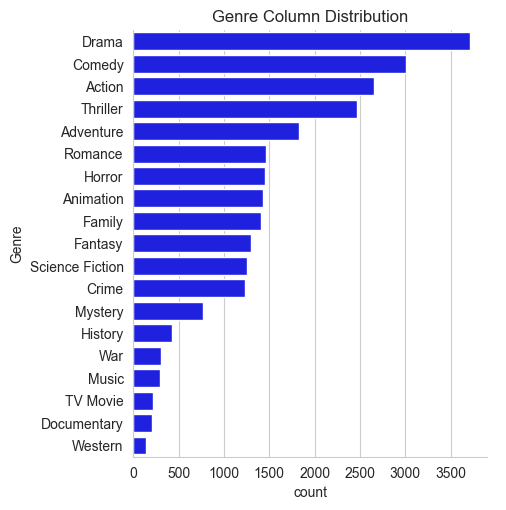

In [50]:
sns.catplot(y= "Genre", data = df, kind = "count", order = df["Genre"].value_counts().index, color = "blue")
plt.title("Genre Column Distribution")
plt.show()

Vote Average Analysis

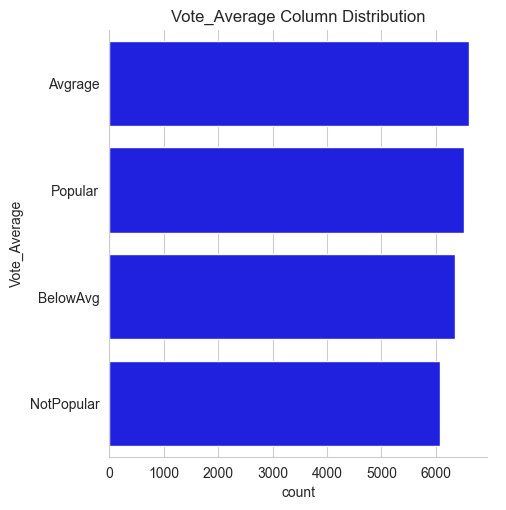

In [51]:
sns.catplot(y="Vote_Average", color="blue", data=df, kind="count", order=df["Vote_Average"].value_counts().index)
plt.title("Vote_Average Column Distribution")
plt.show()

Most Popular

In [53]:
df[df["Popularity"] == df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,Popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,Popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,Popular,Science Fiction


Least Popular

In [54]:
df[df["Popularity"] == df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021.0,The United States vs. Billie Holiday,13.354,152.0,Avgrage,Music
25546,2021.0,The United States vs. Billie Holiday,13.354,152.0,Avgrage,Drama
25547,2021.0,The United States vs. Billie Holiday,13.354,152.0,Avgrage,History
25548,1984.0,Threads,13.354,186.0,Popular,War
25549,1984.0,Threads,13.354,186.0,Popular,Drama
25550,1984.0,Threads,13.354,186.0,Popular,Science Fiction


Release Date Trends

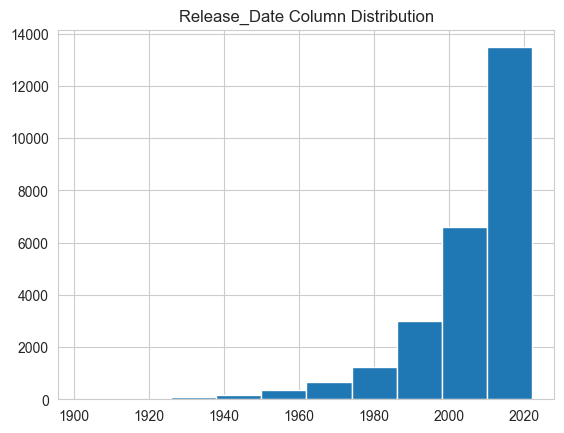

In [55]:
df["Release_Date"].hist()
plt.title("Release_Date Column Distribution")
plt.show()